In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itable
import pylab as pl
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics, naive_bayes, cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from prettytable import PrettyTable
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import boxplot_frame_groupby
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [87]:
dat = pd.read_csv("EEG data.csv")
dat2 = pd.read_csv("demographic info.csv")
dat.shape # There are 12811 observations

(12811, 15)

In [88]:
# Display the first five observations
dat.head()

,subject ID,Video ID,Attention,Meditation,Raw,Delta,Theta,Alpha 1,Alpha 2,Beta 1,Beta 2,Gamma1,Gamma2,predefined label,Self-defined label
0,0,0,56,43,278,301963,90612,33735,23991,27946,45097,33228,8293,0,0
1,0,0,40,35,-50,73787,28083,1439,2240,2746,3687,5293,2740,0,0
2,0,0,47,48,101,758353,383745,201999,62107,36293,130536,57243,25354,0,0
3,0,0,47,57,-5,2012240,129350,61236,17084,11488,62462,49960,33932,0,0
4,0,0,44,53,-8,1005145,354328,37102,88881,45307,99603,44790,29749,0,0


In [95]:
# Drop subject6 and merge
new_dat = dat.merge(dat2, on='subject ID', how='left')
new_dat.shape

(12811, 18)

In [97]:
new_dat = new_dat[new_dat["subject ID"] != 6]
new_dat.shape

(11536, 18)

In [103]:
# Convert to a csv file
new_dat.to_csv("EEG_merged.csv", index = False)

## Now, Do with the new dataset!

In [145]:
dat = pd.read_csv("EEG_merged.csv")
dat.head()

,subject ID,Video ID,Attention,Meditation,Raw,Delta,Theta,Alpha 1,Alpha 2,Beta 1,Beta 2,Gamma1,Gamma2,predefined label,Self-defined label,age,ethnicity,gender
0,0,0,56,43,278,301963,90612,33735,23991,27946,45097,33228,8293,0,0,25,Han Chinese,M
1,0,0,40,35,-50,73787,28083,1439,2240,2746,3687,5293,2740,0,0,25,Han Chinese,M
2,0,0,47,48,101,758353,383745,201999,62107,36293,130536,57243,25354,0,0,25,Han Chinese,M
3,0,0,47,57,-5,2012240,129350,61236,17084,11488,62462,49960,33932,0,0,25,Han Chinese,M
4,0,0,44,53,-8,1005145,354328,37102,88881,45307,99603,44790,29749,0,0,25,Han Chinese,M


In [146]:
# Display the mean of each attribute, grouped by 9 students
mean_dis_stu = dat.groupby(['subject ID']).mean()
mean_dis_stu

,Video ID,Attention,Meditation,Raw,Delta,Theta,Alpha 1,Alpha 2,Beta 1,Beta 2,Gamma1,Gamma2,predefined label,Self-defined label,age
subject ID,,,,,,,,,,,,,,,
0,4.313243,48.630452,48.571768,33.042030,684941.555908,165919.786677,35990.755749,24487.685964,20288.437748,37128.914354,38343.019826,15736.938937,0.473434,0.511499,25.0
1,4.461184,45.561107,57.935434,33.599539,428179.287471,125888.289777,31765.673328,22985.478094,20740.016141,13590.006918,7021.468870,4535.732513,0.489623,0.402767,24.0
2,4.433801,55.971184,60.865265,33.904984,39549.890966,19263.661994,7781.796729,8248.434579,7975.485202,8410.145639,4621.512461,3556.214953,0.482866,0.508567,31.0
3,4.432268,40.044140,45.648402,34.219178,780844.464231,221221.465753,52551.698630,34068.783105,23391.176560,24573.475647,12363.896499,5303.480213,0.384323,0.493912,28.0
4,4.440154,44.895753,52.888803,38.635521,363673.088031,108926.853282,25011.400772,19826.601544,17363.406950,15166.986100,11229.140541,8828.527413,0.487259,0.584556,24.0
5,4.315372,46.616482,54.213946,34.487322,751906.218700,241902.458003,58220.128368,39022.931854,26944.388273,23847.141838,13674.559429,4347.840729,0.473851,0.607765,24.0
7,4.387931,44.844044,50.167712,36.307994,568962.452978,130318.122257,30058.974138,20911.165361,18988.803292,28899.112853,21948.364420,15656.793103,0.479624,0.618339,25.0
8,4.393916,43.990640,50.177847,35.666147,830712.153666,236931.875195,54706.961778,38513.213729,26461.799532,24249.097504,15605.233229,9436.329173,0.482059,0.402496,25.0
9,4.313243,42.507534,51.110230,29.070579,870734.973830,180547.519429,51447.114195,45816.708168,20216.413957,46573.854084,28369.115781,6730.126090,0.473434,0.498810,24.0


In [108]:
count_per_subject_id = dat.groupby(['subject ID']).size()
count_per_subject_id # Oh well.. the number of observations per students are not the same!

subject ID
0    1261
1    1301
2    1284
3    1314
4    1295
5    1262
7    1276
8    1282
9    1261
dtype: int64

In [297]:
# Do the random sampling for stratification
end_idx = 0
front_idx = 0
def random_stratification(df, debug = False):
    global end_idx
    global front_idx
    str_df = pd.DataFrame()
    for i in range(len(count_per_subject_id)+1):
        if i == 6: # Skip the subject id = 6
            continue
        else:
            end_idx += count_per_subject_id[i]
            front_idx = end_idx - count_per_subject_id[i]
            temp_df = df.iloc[front_idx:end_idx]
            temp_df.index = [x for x in range(end_idx-front_idx)]
            
            samp_idx = np.random.choice(temp_df[temp_df['subject ID'] == i].index, 
                                    min(count_per_subject_id), replace = False)
            samp_idx = sorted(samp_idx) # sort the index

            if debug:
                print(str_df)
                print(str_df.shape)
            str_df = str_df.append(temp_df.iloc[samp_idx])
    return str_df

In [298]:
stratified_dat = random_stratification(dat)
stratified_dat.shape

(11349, 18)

In [ ]:
np.corrcoef

In [301]:
count_per_subject_id2 = stratified_dat.groupby(['subject ID']).size()
count_per_subject_id2 # Great! We have a same number of observations per subject ID

subject ID
0    1261
1    1261
2    1261
3    1261
4    1261
5    1261
7    1261
8    1261
9    1261
dtype: int64

In [302]:
stratified_dat.to_csv("Stratified_EEG_data.csv", index = False)

In [253]:
dat = pd.read_csv("EEG_norm_outliers_removed_strat.csv")
dat.head()

,subjectid,videoid,attention,meditation,raw,delta,theta,alpha1,alpha2,beta1,...,gamma1,gamma2,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M,predefinedlabel,self-definedlabel
0,3,0,0.060606,0.525773,0.689794,0.867288,0.535079,0.720607,0.478347,0.389121,...,0.513935,0.503555,28,0.0,0.0,1.0,1.0,0.0,0,0
1,3,0,0.282828,0.494845,0.570814,0.913702,0.454668,0.566280,0.490893,0.586673,...,0.613883,0.383890,28,0.0,0.0,1.0,1.0,0.0,0,0
2,3,0,0.525253,0.742268,0.242833,0.773431,0.380002,0.573420,0.668554,0.645050,...,0.667059,0.404266,28,0.0,0.0,1.0,1.0,0.0,0,0
3,3,0,0.525253,0.742268,0.601204,0.678648,0.332750,0.525935,0.398881,0.388893,...,0.462761,0.619623,28,0.0,0.0,1.0,1.0,0.0,0,0
4,3,0,0.555556,0.876289,0.666571,0.753765,0.674127,0.882809,0.868843,0.729096,...,0.905037,0.630379,28,0.0,0.0,1.0,1.0,0.0,0,0


In [4]:
# temp = dat.groupby(['predefinedlabel']).mean()
# new_temp = temp.drop(['subjectid', 'videoid', 'age'], axis=1)
# new_temp.T.plot(kind='bar', figsize=(14,8))
# plt.title("Predefined Label distribution for each attribute's mean")
# plt.xlabel("Attribute")
# plt.ylabel("Mean")
# plt.show()


In [5]:
# temp = dat.groupby(['self-definedlabel']).mean()
# new_temp = temp.drop(['subjectid', 'videoid', 'age'], axis=1)
# new_temp.T.plot(kind='bar', figsize=(14,8))
# plt.title("Self defined Label distribution for each attribute's mean")
# plt.xlabel("Attribute")
# plt.ylabel("Mean")
# plt.show()

In [6]:
# temp = dat.groupby(['self-definedlabel']).mean()
# print(temp.T)

## 1. A decision tree

In [3]:
# 1. remove subjectid and videoid / then split into exp & tar variable
new_dat = dat.iloc[:,2:14]
new_dat.head()

,attention,meditation,raw,delta,theta,alpha1,alpha2,beta1,beta2,gamma1,gamma2,age
0,0.060606,0.525773,0.689794,0.867288,0.535079,0.720607,0.478347,0.389121,0.477901,0.513935,0.503555,28
1,0.282828,0.494845,0.570814,0.913702,0.454668,0.566280,0.490893,0.586673,0.665260,0.613883,0.383890,28
2,0.525253,0.742268,0.242833,0.773431,0.380002,0.573420,0.668554,0.645050,0.571373,0.667059,0.404266,28
3,0.525253,0.742268,0.601204,0.678648,0.332750,0.525935,0.398881,0.388893,0.290201,0.462761,0.619623,28
4,0.555556,0.876289,0.666571,0.753765,0.674127,0.882809,0.868843,0.729096,0.805422,0.905037,0.630379,28


In [250]:
tar = dat.iloc[:,20:]
tar.head()

,self-definedlabel
0,0
1,0
2,0
3,0
4,0


In [350]:
# 2. Split into training and testing set / validation set 6:2:2
dat_train, dat_test, dat_train_target, dat_test_target = train_test_split(new_dat, tar, test_size=0.2, random_state=33)
# dat_train, dat_validation, dat_train_target, dat_validation_target = train_test_split(dat_train, dat_train_target, test_size=0.25, random_state=33)

# dat_train.to_csv("EEG_train.csv", index = False)
# dat_test.to_csv("EEG_test.csv", index = False)
# # dat_validation.to_csv("EEG_validation.csv", index = False)
# dat_train_target.to_csv("EEG_train_target.csv", index = False)
# dat_test_target.to_csv("EEG_test_target.csv", index = False)
# dat_validation_target.to_csv("EEG_validation_target.csv", index = False)

# print(dat_train.shape) # 60%
# print(dat_test.shape) # 20%
# print(dat_validation.shape) # 20%

In [403]:
# 3. Build a decision tree
dt = tree.DecisionTreeClassifier()
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [404]:
dt = dt.fit(dat_train, dat_train_target)

In [405]:
dt_prediction = dt.predict(dat_test)
print(dt_prediction[:30])

[0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1]


In [406]:
# Confusion matrix
cm = confusion_matrix(dat_test_target, dt_prediction)
cm

array([[584, 415],
       [411, 660]])

In [407]:
print("Accuracy : {0:.3f}".format(metrics.accuracy_score(dat_test_target, dt_prediction)))

Accuracy : 0.601


In [408]:
# Show classification report
print(metrics.classification_report(dat_test_target, dt_prediction)+"\n")

             precision    recall  f1-score   support

          0       0.59      0.58      0.59       999
          1       0.61      0.62      0.62      1071

avg / total       0.60      0.60      0.60      2070




In [ ]:
# Some tasks to be considered
# 1. Since we have both predefined and user-defined labels, simply compare them to calculate accuracy (the most boring task)
# 2. Use usef-defined label as a target variable and build a prediction
# 3. Without knowing their confusion level, create clusters? 
# 4. etc...

# We could use Logistic Regression / Decision Tree / Naive Baye / SVM / etc.... 
# We can also use some Ensemble learning methods... to be considered

In [ ]:
# Matt - Aggregation 
# Abram - SVM, LDA
# Hyunyou - Kernel PCA , data visualization, clustering 
# Sungmin - RF and (hard/soft) VS DT VS NB

In [215]:
new_dat.columns

Index(['attention', 'meditation', 'raw', 'delta', 'theta', 'alpha1', 'alpha2',
       'beta1', 'beta2', 'gamma1', 'gamma2', 'age'],
      dtype='object')

In [222]:
clf = RandomForestClassifier()
clf.fit(dat_train, dat_train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [223]:
pre_rf = clf.predict(dat_test)
# Confusion matrix
cm2 = confusion_matrix(dat_test_target, pre_rf)
cm2

array([[696, 303],
       [439, 632]])

In [224]:
print("Accuracy : {0:.3f}".format(metrics.accuracy_score(dat_test_target, pre_rf)))

Accuracy : 0.642


In [221]:
# Show classification report
print(metrics.classification_report(dat_test_target, dt_prediction)+"\n")

             precision    recall  f1-score   support

          0       0.59      0.60      0.59       999
          1       0.62      0.62      0.62      1071

avg / total       0.61      0.61      0.61      2070




In [226]:
# Simple Naive Bayes
nb = naive_bayes.GaussianNB()
nb_fit = nb.fit(dat_train, dat_train_target)
nb_pred = nb_fit.predict(dat_test)

array([0, 0, 0, ..., 1, 1, 0])

In [227]:
# Confusion matrix
cm3 = confusion_matrix(dat_test_target, nb_pred)
cm3

array([[589, 410],
       [462, 609]])

In [228]:
print("Accuracy : {0:.3f}".format(metrics.accuracy_score(dat_test_target, nb_pred)))

Accuracy : 0.579


In [229]:
# Show classification report
print(metrics.classification_report(dat_test_target, nb_pred)+"\n")

             precision    recall  f1-score   support

          0       0.56      0.59      0.57       999
          1       0.60      0.57      0.58      1071

avg / total       0.58      0.58      0.58      2070




## Build diverse Random Forests 

In [429]:
np.random.seed(1234)
rf_model = RandomForestClassifier(n_estimators = 61, max_depth = 9,
                                 max_features = 6, oob_score = True)

In [430]:
features = ['attention', 'meditation', 'raw', 'delta', 'theta', 'alpha1', 'alpha2',
       'beta1', 'beta2', 'gamma1', 'gamma2', 'age']

In [431]:
# Train the model
rf_model.fit(X = dat_train[features], y = dat_train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=6, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [432]:
rf_model.oob_score_

0.67181964573268926

In [414]:
feature_imp_sorted = sorted(feature_imp.items(), key =lambda x : x[1], reverse = True)

In [415]:
# Random forest clasifier assigns an importance value to each feature in training
feature_imp_sorted

[('attention', 0.13140841227058783),
 ('gamma2', 0.10287504392675298),
 ('delta', 0.099302454940374069),
 ('theta', 0.096180801454999659),
 ('gamma1', 0.093306753903431044),
 ('beta2', 0.090117590715446463),
 ('beta1', 0.078219686202722405),
 ('alpha2', 0.071647524448302038),
 ('meditation', 0.064241362019138007),
 ('raw', 0.060707461856992995),
 ('age', 0.056576377109705069),
 ('alpha1', 0.055416531151547474)]

In [349]:
# Hyper-parameter tuning
max_features = [2,3,4,6]
max_depth = [x for x in range(2,10)]
n_estimators = [y for y in range(2,100)]

In [350]:
highest_acc = 0
def RandomForestParameterTuning():
    global highest_acc
    for j in max_features:
        for k in max_depth:
            for l in n_estimators:                 
                rf_model = RandomForestClassifier(n_estimators = l, max_depth = k,
                                                  max_features = j, oob_score = True)
                rf_model.fit(X = dat_validation[features], y = dat_validation_target)
                if rf_model.oob_score_ > highest_acc:
                    highest_acc = rf_model.oob_score_
                    print('found higher acc at.. num trees :' , l, ' num_depth : ', k, ' max_features : ', j, ' acc : ', rf_model.oob_score_)

In [346]:
highest_acc = 0
def RandomForestParameterTuning():
    global highest_acc
    for j in max_features:
        for k in max_depth:
            for l in n_estimators:                 
                rf_model = RandomForestClassifier(criterion = 'entropy', n_estimators = l, max_depth = k,
                                                  max_features = j, oob_score = True)
                rf_model.fit(X = dat_train[features], y = dat_train_target)
                if rf_model.oob_score_ > highest_acc:
                    highest_acc = rf_model.oob_score_
                    print('found higher acc at.. num trees :' , l, ' num_depth : ', k, ' max_features : ', j, ' acc : ', rf_model.oob_score_)

In [351]:
RandomForestParameterTuning()

found higher acc at.. num trees : 2  num_depth :  2  max_features :  2  acc :  0.542995169082
found higher acc at.. num trees : 4  num_depth :  2  max_features :  2  acc :  0.545410628019
found higher acc at.. num trees : 5  num_depth :  2  max_features :  2  acc :  0.561352657005
found higher acc at.. num trees : 7  num_depth :  2  max_features :  2  acc :  0.565217391304
found higher acc at.. num trees : 9  num_depth :  2  max_features :  2  acc :  0.582608695652
found higher acc at.. num trees : 12  num_depth :  2  max_features :  2  acc :  0.589371980676
found higher acc at.. num trees : 15  num_depth :  2  max_features :  2  acc :  0.589855072464
found higher acc at.. num trees : 17  num_depth :  2  max_features :  2  acc :  0.595652173913
found higher acc at.. num trees : 20  num_depth :  2  max_features :  2  acc :  0.598550724638
found higher acc at.. num trees : 27  num_depth :  2  max_features :  2  acc :  0.6
found higher acc at.. num trees : 28  num_depth :  2  max_features

In [ ]:
# RF with entropy, n_estimator : 45, max_features : 3, depth 9 gives the highest acc 67.2
# RF with gini-index, n_estimator : 45, max_features : 6, depth 9 gives 67.9

# Running on validation set gives
#found higher acc at.. num trees : 61  num_depth :  9  max_features :  6  acc :  0.661835748792



### Random Forest with Feature Selection 

In [23]:
impo_dat_train = dat_train.loc[:, ['attention', 'gamma2', 'delta', 'theta', 'gamma1', 'beta2']]
impo_features = ['attention', 'gamma2', 'delta', 'theta', 'gamma1', 'beta2']

# Hyper-parameter tuning
max_features = [2,3,6]
max_depth = [x for x in range(2,10)]
n_estimators = [y for y in range(2,100)]

In [376]:
highest_acc = 0
def RandomForestParameterTuning():
    global highest_acc
    for j in max_features:
        for k in max_depth:
            for l in n_estimators:                 
                rf_model = RandomForestClassifier(criterion = 'entropy', n_estimators = l, max_depth = k,
                                                  max_features = j, oob_score = True)
                rf_model.fit(X = impo_dat_train[impo_features], y = dat_train_target)
                if rf_model.oob_score_ > highest_acc:
                    highest_acc = rf_model.oob_score_
                    print('found higher acc at.. num trees :' , l, ' num_depth : ', k, ' max_features : ', j, ' acc : ', rf_model.oob_score_)

In [416]:
# RandomForestParameterTuning()

### Decide the optimal Tree 

In [419]:
accuracy = []
n_estimators = [z for z in range(2,300)]
def OptimalTreeFinder():
    for l in n_estimators:                 
        rf_model = RandomForestClassifier(n_estimators = l, max_depth = 9,
                                          max_features = 2, oob_score = True)
        rf_model.fit(X = dat_train[features], y = dat_train_target)
        accuracy.append(rf_model.oob_score_)

In [420]:
OptimalTreeFinder()

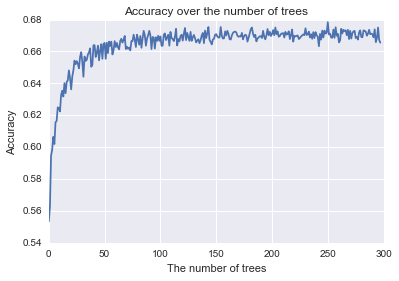

In [428]:
plt.plot([x for x in range(len(accuracy))], accuracy)
plt.xlabel('The number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy over the number of trees')
plt.show()

In [436]:
rf_pred = rf_model.predict(dat_test)
cm4 = confusion_matrix(dat_test_target, rf_pred)
cm4

array([[644, 355],
       [325, 746]])

In [437]:
print("Accuracy : {0:.3f}".format(metrics.accuracy_score(dat_test_target, rf_pred)))

Accuracy : 0.671


In [438]:
# Show classification report
print(metrics.classification_report(dat_test_target, rf_pred)+"\n")

             precision    recall  f1-score   support

          0       0.66      0.64      0.65       999
          1       0.68      0.70      0.69      1071

avg / total       0.67      0.67      0.67      2070




### Build a model with optimized hyper-parameter

In [351]:
# RF with gini-index, n_estimator : 45, max_features : 6, depth 9 gives 67.9
np.random.seed(1234)
final_rf_model = RandomForestClassifier(n_estimators = 45, max_depth = 9,
                                 max_features = 6, oob_score = True)

In [352]:
final_rf_model.fit(X = dat_train, y = dat_train_target)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=6, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [353]:
final_rf_pred = final_rf_model.predict(dat_test)

In [354]:
cm5 = confusion_matrix(dat_test_target, final_rf_pred)
cm5

array([[648, 351],
       [328, 743]])

In [355]:
# Show classification report
print(metrics.classification_report(dat_test_target, final_rf_pred)+"\n")

             precision    recall  f1-score   support

          0       0.66      0.65      0.66       999
          1       0.68      0.69      0.69      1071

avg / total       0.67      0.67      0.67      2070




In [356]:
print("Accuracy : {0:.3f}".format(metrics.accuracy_score(dat_test_target, final_rf_pred)))

Accuracy : 0.672


## Increase size of training set

In [256]:
dat.head()
new_dat2 = dat.iloc[:,2:14]

In [261]:
# Make a new dataframe with target variable
new_dat2['Target'] = dat.iloc[:, 20]
new_dat2.shape

(10350, 13)

In [102]:
def calculate_mn(dd):
    idx = 0
    container = []
    while True:
        if idx == dd.shape[0]-1:
            break
        else:
            mean = (dd[idx] + dd[idx+1]) / 2
            container.append(mean)
            idx = idx + 1
        
    return container

In [145]:
haha = new_dat.apply(lambda x: calculate_mn(x), axis=0)

In [265]:
final_dat = pd.DataFrame(columns=new_dat2.columns)

In [266]:
for k in range(new_dat.shape[0]-1):
    final_dat = final_dat.append(new_dat2.iloc[k]) 
    temp_dat = pd.DataFrame([(haha[j][k]) for j in range(12)]).T
    temp_dat['Target'] = final_dat['Target'][k]
    temp_dat.columns = final_dat.columns
    final_dat = final_dat.append(temp_dat)

In [268]:
final_dat.head()

,attention,meditation,raw,delta,theta,alpha1,alpha2,beta1,beta2,gamma1,gamma2,age,Target
0,0.060606,0.525773,0.689794,0.867288,0.535079,0.720607,0.478347,0.389121,0.477901,0.513935,0.503555,28.0,0.0
0,0.171717,0.510309,0.630304,0.890495,0.494873,0.643444,0.484620,0.487897,0.571580,0.563909,0.443723,28.0,0.0
1,0.282828,0.494845,0.570814,0.913702,0.454668,0.566280,0.490893,0.586673,0.665260,0.613883,0.383890,28.0,0.0
0,0.404040,0.618557,0.406823,0.843566,0.417335,0.569850,0.579724,0.615861,0.618316,0.640471,0.394078,28.0,0.0
2,0.525253,0.742268,0.242833,0.773431,0.380002,0.573420,0.668554,0.645050,0.571373,0.667059,0.404266,28.0,0.0


In [320]:
final_dat.index = [x for x in range(final_dat.shape[0])]

,attention,meditation,raw,delta,theta,alpha1,alpha2,beta1,beta2,gamma1,gamma2,age,Target
0,0.060606,0.525773,0.689794,0.867288,0.535079,0.720607,0.478347,0.389121,0.477901,0.513935,0.503555,28.0,0.0
1,0.171717,0.510309,0.630304,0.890495,0.494873,0.643444,0.484620,0.487897,0.571580,0.563909,0.443723,28.0,0.0
2,0.282828,0.494845,0.570814,0.913702,0.454668,0.566280,0.490893,0.586673,0.665260,0.613883,0.383890,28.0,0.0
3,0.404040,0.618557,0.406823,0.843566,0.417335,0.569850,0.579724,0.615861,0.618316,0.640471,0.394078,28.0,0.0
4,0.525253,0.742268,0.242833,0.773431,0.380002,0.573420,0.668554,0.645050,0.571373,0.667059,0.404266,28.0,0.0


## Separate training/testing

In [357]:
dat_train2, dat_test2, dat_train_target2, dat_test_target2 = train_test_split(final_dat, final_dat['Target'], test_size=0.2)

In [358]:
final_rf_model = RandomForestClassifier(n_estimators = 45, max_depth = 9,
                                 max_features = 6, oob_score = True)

In [359]:
final_rf_model.fit(X = dat_train2, y = dat_train_target2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=6, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [360]:
final_rf_pred = final_rf_model.predict(dat_test2)

In [361]:
cm6 = confusion_matrix(dat_test_target2, final_rf_pred)
cm6

array([[1981,    0],
       [   0, 2159]])

In [362]:
print("Accuracy : {0:.3f}".format(metrics.accuracy_score(dat_test_target2, final_rf_pred)))

Accuracy : 1.000


In [330]:
# Show classification report
print(metrics.classification_report(dat_test_target2, final_rf_pred)+"\n")

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      1996
        1.0       1.00      1.00      1.00      2144

avg / total       1.00      1.00      1.00      4140




In [331]:
dt = tree.DecisionTreeClassifier()
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [332]:
dt = dt.fit(dat_train2, dat_train_target2)
dt_prediction = dt.predict(dat_test2)
print(dt_prediction[:30])
cm = confusion_matrix(dat_test_target2, dt_prediction)
cm

[ 0.  1.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.]


array([[1996,    0],
       [   0, 2144]])